# CS 109A/AC 209A/STAT 121A Data Science: Homework 3
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 28th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW3.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.cross_validation import train_test_split as sk_split
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
%matplotlib inline

/Users/linyingzhang/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Last: Zhang, First: Linying]

### Part (b): Course Number

[AC 209a]

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated] None.

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Multiple linear regression

### Part (a): Implement multiple linear regression from scratch

You are provided a data set containing attributes related to automobiles as well as their corresponding prices. The task is to build a linear regression model from scratch that can estimate the price of an automobile (response variable) using its attributes (predictor variables).

The file ``dataset_1_train.txt`` contains the training set that you can use to fit a regression model, and the file ``dataset_1_test.txt`` contains the test set that you can use to evaluate the model. In each file, the first two columns contain the predictors of the automobile, namely ``'horsepower'`` and ``'highway MPG'``, and the last column contains the automobile prices.

- Implement the following two functions from scratch. 

    - ``multiple_linear_regression_fit``:

        - takes as input: the training set, ``x_train``, ``y_train``

        - fits a multiple linear regression model

        - returns the model parameters (coefficients on the predictors, as an array, and the intercept, as a float).

    - ``multiple_linear_regression_score``:

        - takes model parameters (coefficients and intercept) and the test set, ``x_test`` ``y_test``, as inputs

        - returns the R^2 score for the model on the test set, along with the predicted y-values.
        
- Use your functions to predict automobile prices and evaluate your predictions.

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

In [19]:
### Functions for fitting and evaluating multiple linear regression
### Functions for fitting and evaluating multiple linear regression

#--------  multiple_linear_regression_fit
# A function for fitting a multiple linear regression
# Fitted model: f(x) = x.w + c
# Input: 
#      x_train (n x d array of predictors in training data)
#      y_train (n x 1 array of response variable vals in training data)
# Return: 
#      w (d x 1 array of coefficients) 
#      c (float representing intercept)

def multiple_linear_regression_fit(x_train, y_train):
    
    # Append a column of one's to x
    n = x_train.shape[0]
    ones_col = np.ones((n, 1))
    
    x_train = np.concatenate((x_train, ones_col), axis=1)
    
    # Compute transpose of x
    x_transpose = np.transpose(x_train)
    
    # Compute coefficients: w = inv(x^T * x) x^T * y
    # Compute intermediate term: inv(x^T * x)
    # Note: We have to take pseudo-inverse (pinv), just in case x^T * x is not invertible 
    x_t_x_inv = np.linalg.pinv(np.dot(x_transpose, x_train))
    
    # Compute w: inter_term * x^T * y 
    w = np.dot(np.dot(x_t_x_inv, x_transpose), y_train)
    
    # Obtain intercept: 'c' (last index)
    c = w[-1]
    
    return w[:-1], c

#--------  multiple_linear_regression_score
# A function for evaluating R^2 score and MSE 
# of the linear regression model on a data set
# Input: 
#      w (d x 1 array of coefficients)
#      c (float representing intercept)
#      x_test (n x d array of predictors in testing data)
#      y_test (n x 1 array of response variable vals in testing data)
# Return: 
#      r_squared (float) 
#      y_pred (n x 1 array of predicted y-vals)

def multiple_linear_regression_score(w, c, x_test, y_test):        
    # Compute predicted labels
    y_pred = np.dot(x_test, w) + c
    
    # Evaluate sqaured error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1 - sq_error / y_variance

    return r_squared, y_pred

In [20]:
# Load train and test data sets
data_train = np.loadtxt('datasets/dataset_1_train.txt', delimiter=',', skiprows=1)
data_test = np.loadtxt('datasets/dataset_1_test.txt', delimiter=',', skiprows=1)

# Split predictors from response
# Training
y_train = data_train[:, -1]
x_train = data_train[:, :-1]

# Testing
y_test = data_test[:, -1]
x_test = data_test[:, :-1]

# Fit multiple linear regression model
w, c = multiple_linear_regression_fit(x_train, y_train)

# Evaluate model
r_squared, _ = multiple_linear_regression_score(w, c, x_test, y_test)

print('R^2 score on test set:', r_squared)

('R^2 score on test set:', 0.17794462732714034)


### Part (b): Confidence interval on regression parameters
Using your linear regression implementation from Part (a), model the data in ``dataset_2.txt``, which contains five predictor variables in the first five columns, and the response variable in the last column.

Compute confidence intervals for the model parameters you obtain:

- Create 200 random subsamples of the data set of size 100, and use your function to fit a multiple linear regression model to each subsample. 

- For each coefficient on the predictor variables: plot a histogram of the values obtained across the subsamples, and calculate the confidence interval for the coefficients at a confidence level of 95%. 

- Highlight the mean coeffcient values and the end points of the confidence intervals using vertical lines on the histogram plot. How large is the spread of the coefficient values in the histograms, and how tight are the confidence intervals?

- Use the formula for computing confidence intervals provided in class (or use ``statmodels``) to compute the the confidence intervals. Compare confidence intervals you find through simulation to the ones given by the formula (or ``statmodels``), are your results what you would expect?

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

In [175]:
# Load train set
data = np.loadtxt("dataset_2.txt", delimiter=',', skiprows = 1)

# Size of data set, and subsample (10%)
x = data[:, :-1]
y = data[:, -1]

# Record size of the data set
n = x.shape[0]
d = x.shape[1]
subsample_size = 100

# No. of subsamples
num_samples = 200
    
### Linear regression with all 5 predictors

# Create a n x d array to store coefficients for 100 subsamples
coefs_multiple = np.zeros((num_samples, d))

print 'Linear regression with all predictors'

# Repeat for 200 subsamples
for i in range(num_samples):
    # Generate a random subsample of 50 data points
    perm = np.random.permutation(n) # Generate a list of indices 0 to n and permute it
    x_subsample = x[perm[:subsample_size], :] # Get x-vals for the first 50 indices in permuted list
    
    y_subsample = y[perm[:subsample_size]] # Get y-vals for the first 50 indices in permuted list

    # Fit linear regression model on subsample
    w, c = multiple_linear_regression_fit(x_subsample, y_subsample)
    # Store the coefficient for the model we obtain
    coefs_multiple[i, :] = w

# Plot histogram of coefficients, and report their confidence intervals 
fig, axes = plt.subplots(1, d, figsize=(20, 3))

# Repeat for each coefficient
for j in range(d):
    # Compute mean for the j-th coefficent from subsamples
    coef_j_mean = np.mean(coefs_multiple[:, j])
    
    # Compute confidence interval at 95% confidence level (use formula!)
    conf_int_left = np.percentile(coefs_multiple[:, j], 2.5)
    conf_int_right = np.percentile(coefs_multiple[:, j], 97.5)
       
    # Plot histogram of coefficient values
    axes[j].hist(coefs_multiple[:, j], alpha=0.5)

    # Plot vertical lines at mean and left, right extremes of confidence interval
    axes[j].axvline(x = coef_j_mean, linewidth=3)
    axes[j].axvline(x = conf_int_left, linewidth=1, c='r')
    axes[j].axvline(x = conf_int_right, linewidth=1, c='r')
    
    # Set plot labels
    axes[j].set_title('[' + str(round(conf_int_left, 4)) 
                      + ', ' 
                      + str(round(conf_int_right, 4)) + ']')
    axes[j].set_xlabel('Predictor ' + str(j + 1))
    axes[j].set_ylabel('Frequency')

plt.show()

Linear regression with all predictors


In [182]:
x = sm.add_constant(x)
# x.shape
# y.shape
# build regression model using sm.OLS
model = sm.OLS(y, x)
results = model.fit()

print "The confidence intervals for predictor 1 to 5 are:"
print results.conf_int(alpha=0.05)[1:6]
    

The confidence intervals for predictor 1 to 5 are:
[[ 0.55277262  0.75038508]
 [ 0.35223041  0.74974337]
 [ 0.08891385  0.47338926]
 [ 0.80980994  1.09854837]
 [ 0.07854262  0.48843361]]


The confidence intervals from the simulation and statsmodel are similar but not identical. If we increase the number of sample times, the confidence interval from simulation would approach the values from statsmodel.

## Problem 2: Polynomial regression
In this problem, we revisit a dataset from Homework 1 and fit polynomial regression models to it. The dataset is provided in the file ``dataset_3.txt``, which contains a single predictor variable ``x`` in the first column and the response variable ``y`` in the second column. 

### Part(a): Implement polynomial regression from scratch

- Implement the following three functions from scratch:

    - ``polynomial_regression_fit``:
        - takes as input: training set, ``x_train``, ``y_train`` and the degree of the polynomial
        - fits a polynomial regression model 
        - returns the model parameters (array of coefficients and the intercept)

    - ``polynomial_regression_predict``: 
        - takes as input: the model parameters (array of coefficients and the intercept), the degree of the polynomial and the test set predictors ``x_test``
        - returns the response values predicted by the model on the test set. 

    - ``polynomial_regression_score``: 
        - takes an array of predicted response values and the array of true response values ``y_test``
        - returns R^2 score for the model on the test set, as well as the sum of squared errors

- Fit polynomial regression models of degrees 3, 5, 10 and 25 to the data set. Visualize the original data along with the fitted models for the various degrees in the same plot. 

For this problem, you may either use the multiple linear regression functions implemented in the Problem 1 or use the in-built functions in ``sklearn``.

In [49]:
# Load train set
data = np.loadtxt("dataset_3.txt", delimiter=',', skiprows = 1)

# Separate x and y 
x_train = data[:, 0]
y_train = data[:, 1]

# write the regression fit function
def polynomial_regression_fit(x_train, y_train, d):
    
    # Create the poly terms for x, x^2...
    
    n = np.size(y_train)   # data size
    x_poly = np.zeros([n, d]) # poly degree
    
    for i in range(1, d + 1):
        x_poly[:, i-1] = np.power(x_train, i)  # appending x, x^2, x^3 by column 
    w, c = multiple_linear_regression_fit(x_poly, y_train)
    return w, c


def polynomial_regression_predict(x_test, w, c, d):
    
    # Create the poly terms for x, x^2...
    
    n = np.size(x_test)   # data size
    x_poly = np.zeros([n, d]) # poly degree
    
    for i in range(1, d + 1):
        x_poly[:, i-1] = np.power(x_test, i)  # appending x, x^2, x^3 by column 
    y_pred = np.dot(x_poly, w) + c
    return y_pred


def polynomial_regression_score(w, c, y_test, y_pred):
    
    # Evaluate sqaured error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1 - sq_error / y_variance

    return r_squared, sq_error

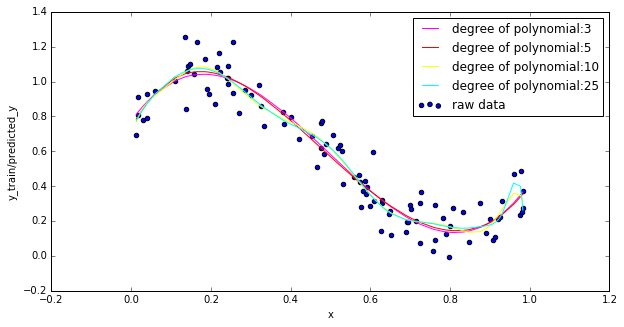

In [50]:
# In order to use plt.plot function, we first need to sort x from small to large.
# the index_array is the indices of x from small to large
index_array = np.argsort(x_train)

# sort y based on the indices of x
y_train = y_train[index_array]

# then sort x so that x and y are match for each row again.
x_train = np.sort(x_train)


# plot the original data
plt.figure(figsize=(10, 5))
plt.xlabel('x')
plt.ylabel('y_train/predicted_y')
plt.scatter(x_train, y_train, label = "raw data")


# build models for d = 3, 5, 10, and 25 and plot the model 
colors = ['magenta', 'red', 'yellow', 'cyan']
counter = 0
for d in [3, 5, 10, 25]:
    # build model to get coeff and the predicted y using x_train
    w, c = polynomial_regression_fit(x_train, y_train, d)
    y_pred = polynomial_regression_predict(x_train, w, c, d)

    # plot each fitted model on top of the scatter plot
    plt.plot(x_train, y_pred, c = colors[counter], label = "degree of polynomial:"+str(d))
    counter += 1
plt.legend(loc = 'best')
plt.show()

###  Part (b): Comparing training and test errors

- Split the data set in Problem 2 each into training and test sets: use the first 50% of the data for training and the remaining for testing. 


- Fit polynomial models of varying degree ranging from 1 to 15 to the training sets. Evaluate  the various fits on **both** the training and the test sets. Plot both the R^2 score of the fitted polynomial models on the training and test sets as a functions of the degree. 


- Describe the relationship between degree of the polynomial model and the fit on both the training and testing data. Explain, based on the plot, what is the best polynomial model for the data.

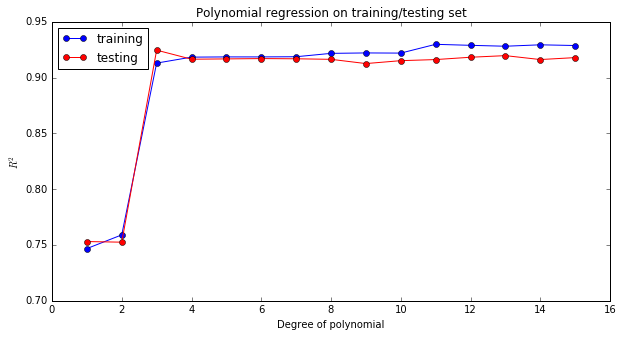

In [134]:
# Load data and split to training and testing
data = np.loadtxt("dataset_3.txt", delimiter=',', skiprows = 1)

# Split the first 50% data into train and remaining into test
train = data[:50, :]
test = data[50:, :]

x_train = train[:, 0]
y_train = train[:, 1]
x_test = test[:, 0]
y_test = test[:, 1]


# create empty arrays to store R^2
r_list_train = np.zeros([15,2])
r_list_test = np.zeros([15,2])

# Fit polynomial models of varying degree ranging from 1 to 15 
# to the training set and testing set
for d in range(1, 16):

    # build model based on the training data
    w, c = polynomial_regression_fit(x_train, y_train, d)

    # predict y of the training set and testing set
    y_pred_train = polynomial_regression_predict(x_train, w, c, d)
    y_pred_test = polynomial_regression_predict(x_test, w, c, d)
    
    # Evaluate prediction by R^2 on both training and testing set
    r_sqr_train, sq_error_train = polynomial_regression_score(w, c, y_train, y_pred_train)
    r_sqr_test, sq_error_test = polynomial_regression_score(w, c, y_test, y_pred_test)
    
    # Store R^2 into arrays
    r_list_train[d-1, 0] = d
    r_list_test[d-1, 0] = d
    r_list_train[d-1, 1] = r_sqr_train
    r_list_test[d-1, 1] = r_sqr_test
    

# Plot the R^2 against degree of polynomial for both training and testing sets
fig = plt.figure(figsize=(10, 5))


plt.plot(r_list_train[:, 0], r_list_train[:, 1], 'bo-', label = 'training')
plt.plot(r_list_test[:, 0], r_list_test[:, 1], 'ro-', label = 'testing')
plt.xlabel("Degree of polynomial")
plt.ylabel('$R^2$')
plt.title("Polynomial regression on training/testing set")
plt.legend(loc='best')
plt.show()

## Problem 3: Model selection criterion
In this problem, we examine various criteria that help us decide how to choose between multiple models for the same data.

###  Part (a): How does one choose the best polynomial degree?
In Problem 2, you fitted polynomials of different degrees to the entire data set, and inspected the quality of fits on the test set. In practice, one needs to find the 'best' model for the given prediction task using **only** the training set. For this, we'll now make use of two model selection criteria, namely, the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These are evaluated on the training set, but serve as a proxy for the test set accuracy.

For ``dataset_3.txt``, do the following:

- For each polynomial model you fitted, compute the AIC and BIC for the model on the training set. Plot the criterion values as a function of the polynomial degree.


- Which model is chosen by each criterion? Do they match with the model that yields maximum test R^2 score?

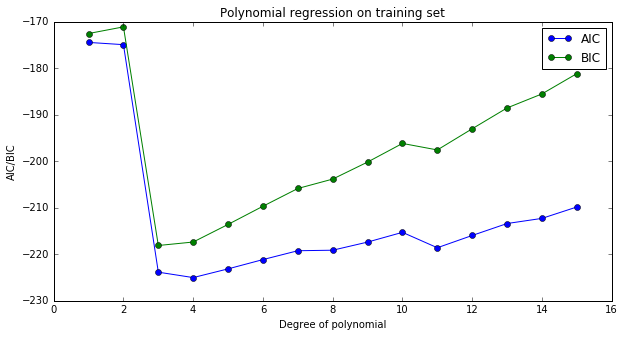

In [139]:
# create empty arrays to store R^2
AIC_array = np.zeros([15,2])
BIC_array = np.zeros([15,2])

# Fit polynomial models of varying degree ranging from 1 to 15 to the training set
n = len(x_train)
for d in range(1, 16):

    # build model based on the training data
    w, c = polynomial_regression_fit(x_train, y_train, d)
    
    # predict y of the training set and testing set
    y_pred_train = polynomial_regression_predict(x_train, w, c, d)

    # Evaluate prediction by R^2 on both training and testing set
    r_sqr_train, sq_error_train = polynomial_regression_score(w, c, y_train, y_pred_train)

    # Calculate AIC
    AIC = n * np.log(sq_error_train/n) + 2 * d
    
    # Calculate AIC
    BIC = n * np.log(sq_error_train/n) + np.log(n) * d
    
    # Store AIC and BIC into arrays
    AIC_array[d-1, 0] = d
    BIC_array[d-1, 0] = d
    AIC_array[d-1, 1] = AIC
    BIC_array[d-1, 1] = BIC

    
# Plot AIC and BIC against degree of polynomial
fig = plt.figure(figsize=(10, 5))

plt.plot(AIC_array[:, 0], AIC_array[:, 1], 'bo-', label = 'AIC')
plt.plot(BIC_array[:, 0], BIC_array[:, 1], 'go-', label = 'BIC')
plt.xlabel("Degree of polynomial")
plt.ylabel('AIC/BIC')
plt.title("Polynomial regression on training set")
plt.legend(loc = 'best')

plt.show()


### Part (b): Application to New York taxi cab density estimation

We shall now apply the concepts learned so far to a real-world prediction task. You are asked to build a regression model for estimating the density of Green cab taxis at any given time of a day in New York city. The model needs to take the time of the day (in minutes) as input, and predict the expected number of pick ups at that time.

The data set for this problem can be downloaded from the following URL: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv. The file contains the details of all pickups by Green cabs in New York City during January 2015. 

In [53]:
import io
import requests
url = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')), skiprows = [0], header = None)
df.head()

0                    1                    2  3   4          5          6   \
0   2  2015-01-01 00:34:42  2015-01-01 00:38:34  N   1 -73.922592  40.754528   
1   2  2015-01-01 00:34:46  2015-01-01 00:47:23  N   1 -73.952751  40.677711   
2   1  2015-01-01 00:34:44  2015-01-01 00:38:15  N   1 -73.843010  40.719055   
3   2  2015-01-01 00:34:48  2015-01-01 00:38:08  N   1 -73.860825  40.757793   
4   2  2015-01-01 00:34:53  2015-01-01 01:09:10  N   1 -73.945183  40.783321   

          7          8   9  ...   13   14   15  16   17    18  19   20  21  22  
0 -73.913635  40.765522   1 ...  0.5  0.0  0.0 NaN  0.3   6.3   2  1.0 NaN NaN  
1 -73.981529  40.658978   1 ...  0.5  0.0  0.0 NaN  0.3  13.3   2  1.0 NaN NaN  
2 -73.846581  40.711567   1 ...  0.5  1.8  0.0 NaN  0.0   7.8   1  1.0 NaN NaN  
3 -73.854042  40.749821   1 ...  0.5  0.0  0.0 NaN  0.3   6.3   2  1.0 NaN NaN  
4 -73.989624  40.765450   1 ...  0.5  0.0  0.0 NaN  0.3  25.8   2  1.0 NaN NaN  

[5 rows x 23 columns]

In [169]:
# Write a function to extract pickup day, time, and convert time to minutes
# store day in list "parse_day" and minutes in list "parse_time"
def time_split(entry):
    #split pickup to date and time
    day_time = entry.split(' ')
    
    # extract hour, minute and second from the string and convert to minutes as integer
    h, m, s = day_time[1].split(':')
    minutes = int(h)*60 + int(m)
    parse_time.append(minutes)
    return parse_time 

# extract the pickup column from dataset
pickup_time = df.loc[:, 1]

# Execute time_split function
parse_time = []
for i in pickup_time:
    parse_time = time_split(i) 

# List all unique minutes in the array and # of occurence
unique, counts = np.unique(parse_time, return_counts=True)
unique = unique.reshape(len(unique), 1)
counts = counts.reshape(len(counts), 1)

# Divide counts by 31 days to get average counts per day 
counts_per_day = counts / float(31)

# Form an array of time (minutes) and its # of occurence
time_counts = np.concatenate((unique, counts_per_day), axis =1)

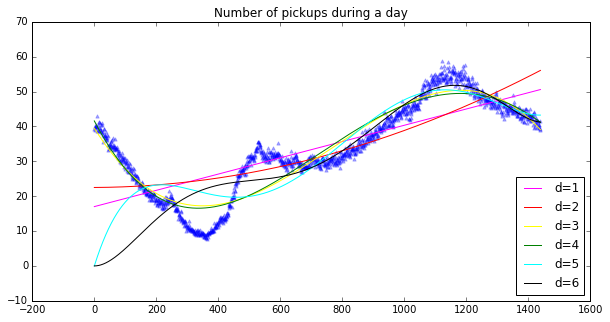

In [172]:
import statsmodels.api as sm

x_train = time_counts[:, 0]
y_train = time_counts[:, 1]

# plot the raw data in scatter plot
plt.figure(figsize=(10,5))
plt.scatter(time_counts[:,0], time_counts[:,1], alpha = 0.3, marker='^', s = 10, color = 'b')
plt.title('Number of pickups during a day')


colours = ['magenta', 'red', 'yellow', 'green', 'cyan', 'black']
counter = 0

# try  polynomial degrees from d=1 to d=7
for d in range(1, 7):
    n = np.size(y_train)   # data size
    x_poly = np.zeros([n, d]) # poly degree
    
    for i in range(1, d + 1):
        x_poly[:, i-1] = np.power(x_train, i)  # appending x, x^2, x^3 by column 

    # add column of ones to the first column of x_poly
    x_poly = sm.add_constant(x_poly)

    # build regression model using sm.OLS
    model = sm.OLS(y_train, x_poly)
    results = model.fit()
    
    # coefficient w and constant c
    w = results.params[1:]
    c = results.params[0]
    
    # predict y values(# of pickups) based on x_train (minutes)
    y_pred = polynomial_regression_predict(x_train, w, c, d)
    
    # plot the regression model overlaid with raw data
    plt.plot(x_train, y_pred, label = 'd='+str(d), color = colours[counter])
    counter += 1
    plt.legend(loc = 'best')
plt.show()

## Challenge Problem: Advanced regression techniques
In this problem, we revisit the automobile pricing data set in Problem 1(a) and explore advanced regression techniques to build better models. 


### Part (a): Polynomial regression on multi-dimensions
In Problems 2-3, you had implemented a polynomial regression technique for data sets with a single predictor variable. How would you use a similar approach to fit a polynomial model on data sets with more than one predictor?

Reload ``dataset_1_train.txt`` and ``dataset_1_test.txt``. Fit polynomial models of degrees 2 and 3 to the training set, and evaluate the R^2 score of the fitted model on the test set. How do they compare with the test performance of a linear regression model?

In [14]:
# Load train and test set
train = np.loadtxt("datasets/dataset_1_train.txt", delimiter=',', skiprows = 1)
test = np.loadtxt("datasets/dataset_1_test.txt", delimiter=',', skiprows = 1)

# Separate x and y 
x_train = train[:, :2]
y_train = train[:, -1]
x_test = test[:, :2]
y_test = test[:, -1]

In [16]:
# write the regression fit function (d = polynomial degree)
def multiple_polynomial_regression_fit(x_train, y_train, d):
    
    # Create the poly terms for x, x^2...
    
    n = np.size(y_train)   # data size
    x_poly1 = np.zeros([n, d]) 
    x_poly2 = np.zeros([n, d])
    
    # appending the first variable x, x^2, x^3... by column
    for i in range(1, d + 1):
        x_poly1[:, i-1] = np.power(x_train[:, 0], i)
        
    # appending the second variable x, x^2, x^3... by column 
    for i in range(1, d + 1):
        x_poly2[:, i-1] = np.power(x_train[:, 1], i)
        
    # concatenante x_poly2 to the right of x_poly1
    x_poly = np.concatenate((x_poly1, x_poly2), axis = 1)
    
    w, c = multiple_linear_regression_fit(x_poly, y_train)
    return w, c

# write the predict and score function (d = polynomial degree)
def multiple_polynomial_regression_score(w, c, d, x_test, y_test):        
    
    n = np.size(y_test)   # data size
    x_test_poly1 = np.zeros([n, d]) 
    x_test_poly2 = np.zeros([n, d])
    
    # appending the first variable x, x^2, x^3... by column
    for i in range(1, d + 1):
        x_test_poly1[:, i-1] = np.power(x_test[:, 0], i)
        
    # appending the second variable x, x^2, x^3... by column 
    for i in range(1, d + 1):
        x_test_poly2[:, i-1] = np.power(x_test[:, 1], i)
        
    # concatenante x_poly2 to the right of x_poly1
    x_test_poly = np.concatenate((x_test_poly1, x_test_poly2), axis = 1)
    
    # Compute predicted labels
    y_pred = np.dot(x_test_poly, w) + c
    
    # Evaluate sqaured error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1 - sq_error / y_variance

    return r_squared

# build model d=2 from training set
w, c = multiple_polynomial_regression_fit(x_train, y_train, 2)

# Compute R^2 by running polynomial d=2 model on test set
r_squared_d2 = multiple_polynomial_regression_score(w, c, 2, x_test, y_test)


# build model d=3 from training set
w, c = multiple_polynomial_regression_fit(x_train, y_train, 3)

# Compute R^2 by running polynomial d=3 model on test set
r_squared_d3 = multiple_polynomial_regression_score(w, c, 3, x_test, y_test)

print "The R^2 of polynomial models of degrees 2 and 3 are:", r_squared_d2, r_squared_d3

The R^2 of polynomial models of degrees 2 and 3 are: 0.385393510353 0.280935138782


### Part (b): Weighted linear regression

Suppose you are told that some of the prices recorded in the training set are noisy, and you are given the list of noisy points, how would you use this information during training to fit a better regression model?

The noise level for each training point is provided in the file dataset_1_train_noise_levels.txt. A noise level 'none' indicates that the price is accurate, and a noise level 'noisy' indicates that the price is only moderately accurate. 

We want to fit a linear regression model that accounts for this new information. One way to do this is to assign different weights to each training point based on the amount of noise associated to that training point. That is, our loss function is now
$$
\sum_{i=1}^n \alpha_i\,(y_i \,-\, w^T x_i)^2
$$
where $\alpha_i$ is a number representing how much you value the contribution of the data point $x_i$.

How does the R^2 score (evaluated on the test set) of the new linear model compare to the one fitted using plain linear regression?

**Solution:**

*Weighted Least Squared Linear Regression*: 

Assign a weight to each training point based on the noise level (higher weight for points with smaller amount of noise), and minimize a weighted least-squres loss during training.

Sample: $X \in \mathbb{R}^{n\times d}$, $Y \in \mathbb{R}^n$

Weights on individual points: $\alpha \in \mathbb{R}^n$   
(Set $\alpha_i$ to 1 for noise level 'none', to 0.25 for noise level 'noisy')

Weighted least-squares loss: $\sum_{i=1}^n \alpha_i\,(y_i \,-\, w^T x_i)^2$

Do some algebra:  $\sum_{i=1}^n \left({\sqrt{\alpha_i}}y_i \,-\, w^T {\sqrt{\alpha_i}}x_i\right)^2$

Now, let $\tilde{x}_i = {\sqrt{\alpha_i}}x_i$ and $\tilde{y}_i = {\sqrt{\alpha_i}}y_i$. That is multiply each $x_i$ and $y_i$ by $\sqrt{\alpha_i}$! Finally, we get:
$$
\sum_{i=1}^n \left(\tilde{y}_i \,-\, w^T \tilde{x}_i\right)^2
$$
and we can proceed with linear regression as usual!



In [17]:
#--------  weighted_linear_regression_fit
# Function for fitting a weighted multiple linear regression
# Input: 
#      x_train (n x d array of x-vals) 
#      y_train (n x 1 array of y-vals) 
#      alpha (n x 1 array of weightes)
# Return: 
#      w (d x 1 array of coefficients) 
#      c (float representing intercept)
def weighted_linear_regression_fit(x, y, alpha):
    
    # Change the x and y values
    # Create a diagonal matrix where the ith diagonal is 1/np.sqrt(alpha[i])
    weights = np.diag(np.sqrt(alpha))
    # Multiply the weight matrix with y-vals: 1/np.sqrt(alpha[i]) * y[i]
    y = np.dot(weights, y)
    # Multiply the weight matrix with x-vals: 1/np.sqrt(alpha[i]) * x[i, :]
    x = np.dot(weights, x)
    
    w, c = multiple_linear_regression_fit(x, y)
    
    return w, c

In [18]:
# Download noise levels
df_noise_levels = pd.read_csv('datasets/dataset_1_train_noise_levels.txt', index_col=False)

# No. of training point
n_train = len(df_noise_levels)

# Assign weights to instances based on noise level:
#  alpha_i = 1 if noise level is 'none'
#  alpha_i = 0.5 if noise level is 'noisy'

noise_levels = df_noise_levels['noise levels']

noise_levels[noise_levels == 'noisy'] = 0.25
noise_levels[noise_levels == 'none'] = 1.
alpha = noise_levels.values
        
# Fit weighted model training set
w, c = weighted_linear_regression_fit(x_train, y_train, alpha.astype('float64'))

# Evaluate weigthed model on testing set
r_squared, _ = multiple_linear_regression_score(w, c, x_test, y_test)
print 'Weighted linear regression: R^2 score on test set =', r_squared


# Fit unweighted model training set
w, c = multiple_linear_regression_fit(x_train, y_train)

# Evaluate unweigthed model on testing set
r_squared,_ = multiple_linear_regression_score(w, c, x_test, y_test)
print 'Unweighted linear regression: R^2 score on test set =', r_squared

Weighted linear regression: R^2 score on test set = -3.80288802402
Unweighted linear regression: R^2 score on test set = 0.177944627327
